In [1]:
%pip install --upgrade pip
%pip install gower

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import gower

In [3]:
# size_df = pd.read_csv("size_ECAI.csv")
# shape_df = pd.read_csv("shape_ECAI.csv")
# position_df = pd.read_csv("position_ECAI.csv")
# 
# size_df = size_df.iloc[:, 1:]
# position_df = position_df.iloc[:, 1:]
# shape_df = pd.read_csv("shape_ECAI.csv")
# 
# size_df.columns = ["size"]
# position_df.columns = ["x", "y"]
# position_df.columns = ["x", "y"]
# all_data_df = pd.read_csv("all_data_ECAI.csv")
# all_data_df = all_data.iloc[:, 1:]

In [4]:
# mixed_data = all_data_df[["x", "y", "Size", "Shape"]]

In [5]:
# Step 2: Load your data into separate DataFrames
# Replace these with your actual data
time_series_df = pd.read_csv("time_series_SOICT.csv")
time_series_df = time_series_df.iloc[:, 1:]


all_data_df = pd.read_csv("all_data_SOICT.csv")
all_data_df

,Unnamed: 0,x,y,Size,Shape,0,1,2,3,4,...,90,91,92,93,94,95,96,97,98,99
0,0,199.503841,3.695512,5,'2',53.779888,61.726151,59.697757,55.340348,64.234954,...,63.919373,54.849126,60.251578,61.144816,53.124822,63.789437,56.110583,56.722605,62.734725,54.809172
1,1,199.848428,5.287708,6,'3',32.872614,35.590804,36.631484,33.498322,32.138343,...,34.635425,36.098022,35.053167,33.007269,32.947067,35.145088,35.952205,33.553050,32.620484,32.821290
2,2,188.230676,-5.391592,6,'2',72.027745,86.731323,82.264202,70.300976,85.361025,...,80.826709,87.770458,71.678529,78.000816,90.132269,75.332856,74.794314,88.461580,77.844619,72.273093
3,3,191.772589,7.203336,5,'1',33.911434,34.803816,35.320241,33.230268,31.710767,...,33.718238,36.113306,35.254650,32.162846,32.750141,34.244472,35.631224,34.562634,31.568066,32.284063
4,4,219.321332,22.915963,5,'0',53.906387,61.411806,59.342208,55.520760,64.731797,...,64.195748,54.110371,60.449616,61.899824,54.097377,63.953537,56.921530,57.315540,63.005824,54.261148
5,5,191.833973,16.258795,6,'0',71.313861,87.020640,81.998292,71.938094,84.507294,...,80.767356,88.610986,72.688229,77.458057,88.894451,74.790907,75.017622,88.170265,78.369490,71.788159
6,6,199.217312,8.942227,6,'1',54.259680,61.422435,59.394216,55.614708,63.656926,...,62.975944,55.232037,60.115416,61.485883,54.444440,63.212882,57.280956,57.387223,62.543852,54.514246
7,7,217.361909,8.649784,6,'1',54.188769,62.427812,59.761784,55.824911,64.423964,...,63.851935,54.917659,58.788761,61.856232,53.861943,63.695202,56.946533,58.084662,63.560934,53.815708
8,8,199.996873,5.569312,5,'1',71.889858,86.404469,82.231517,70.735139,84.130851,...,80.841075,86.824471,73.245498,77.236868,88.570533,75.179254,74.128292,89.160994,78.852322,71.670698
9,9,188.738236,-3.559132,5,'1',72.307582,86.416753,81.909362,71.467405,84.977894,...,80.710606,87.870079,73.410342,78.055835,89.375688,74.806327,74.553207,88.507696,78.763718,71.664697


In [6]:
all_data_df = all_data_df.iloc[:, 1:]
mixed_data_df = all_data_df[["x", "y", "Size", "Shape"]]

In [7]:
# Step 3: Calculate distances for each data type
# Gower distance for mixed data
gower_dist = gower.gower_matrix(mixed_data_df)
gower_dist_df = pd.DataFrame(gower_dist)
gower_dist

array([[0.        , 0.26390514, 0.03996569, ..., 0.5475793 , 0.321477  ,
        0.5572396 ],
       [0.26390514, 0.        , 0.2830375 , ..., 0.5552213 , 0.55828565,
        0.3148816 ],
       [0.03996569, 0.2830375 , 0.        , ..., 0.5641924 , 0.31725678,
        0.5738527 ],
       ...,
       [0.5475793 , 0.5552213 , 0.5641924 , ..., 0.        , 0.27864236,
        0.2714787 ],
       [0.321477  , 0.55828565, 0.31725678, ..., 0.27864236, 0.        ,
        0.28450304],
       [0.5572396 , 0.3148816 , 0.5738527 , ..., 0.2714787 , 0.28450304,
        0.        ]], dtype=float32)

In [8]:
# time_series_array_df

In [9]:
# Time series DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = time_series_df.T

# Function to calculate DTW distance
def dtw_distance(x, y):
    distance, _ = fastdtw(x, y, dist=euclidean)
    return distance

# Calculate the DTW distance matrix
n = len(df.columns)
dtw_dist = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        x = [np.array(df.iloc[:, i]).flatten()]
        y = [np.array(df.iloc[:, j]).flatten()]
        dtw_dist[i, j] = dtw_distance(x, y)
        dtw_dist_df = pd.DataFrame(dtw_dist)

print(dtw_dist_df[0])
print(dtw_dist)

0       0.000000
1     253.491474
2     220.427567
3     253.775542
4       6.339409
5     221.470284
6       6.912523
7       6.450654
8     221.927718
9     221.590305
10      6.852117
11    253.632537
12    252.904222
13      6.269326
14    253.647885
15      7.433900
16      7.734728
17    253.788164
18      7.112025
19    221.842749
20    253.951714
21      6.313796
22    220.676862
23      6.274033
24    221.664103
25    253.261563
26      6.847069
27    252.751645
28    253.162351
29    253.214998
30    221.668979
31    253.272812
32      7.604479
33    252.977466
34    221.563318
35      7.007799
36      6.767311
37      7.033442
38      7.136481
39    221.359064
40      7.312496
41    222.279491
42    253.099864
43    253.073541
44    253.433877
45    253.379469
46    221.835438
47    221.810952
48    222.131459
49      6.463676
Name: 0, dtype: float64
[[  0.         253.49147424 220.42756658 ... 221.81095244 222.13145909
    6.46367568]
 [253.49147424   0.         463.3118801

In [10]:
x = np.array([[1], [2], [3], [4], [5]])
y = np.array([[2], [3], [4], [5], [6]])
distance, path = fastdtw(x, y, dist=euclidean)
print(distance)

2.0


In [11]:
# Step 4: Normalize the distances
scaler = MinMaxScaler()
gower_dist_norm = scaler.fit_transform(gower_dist)
dtw_dist_norm = scaler.fit_transform(dtw_dist)

In [12]:
# Step 5: Add up the distances
total_dist_norm = gower_dist_norm + dtw_dist_norm
total_dist = gower_dist + dtw_dist

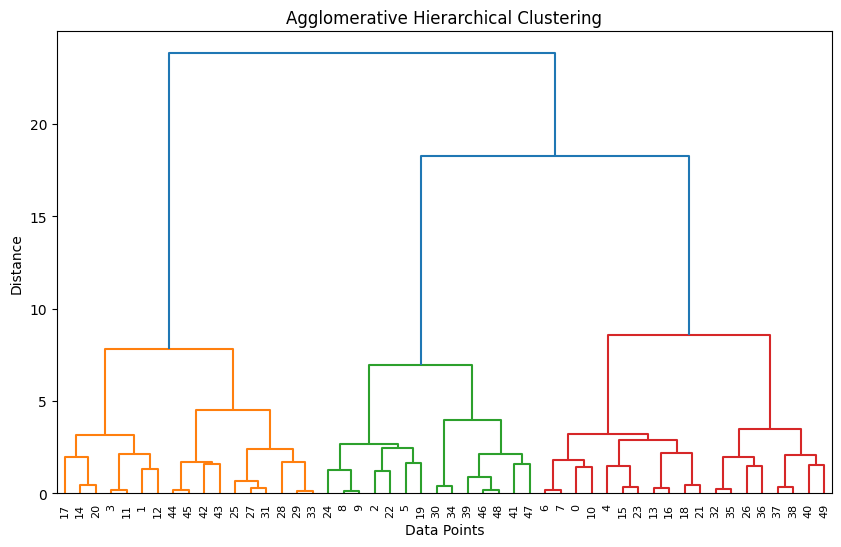

In [13]:
# Step 6: Perform ascending hierarchical clustering
Z = linkage(total_dist_norm, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Agglomerative Hierarchical Clustering")
plt.show()

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Extract the labels for three clusters
cluster_labels = fcluster(Z, t=4, criterion='maxclust')

# Save the labels as a DataFrame
labels_df = pd.DataFrame({'Label': cluster_labels}, index=df.columns)
print(labels_df['Label'].tolist())

[3, 1, 2, 1, 3, 2, 3, 3, 2, 2, 3, 1, 1, 3, 1, 3, 3, 1, 3, 2, 1, 3, 2, 3, 2, 1, 4, 1, 1, 1, 2, 1, 4, 1, 2, 4, 4, 4, 4, 2, 4, 2, 1, 1, 1, 1, 2, 2, 2, 4]
